# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$w_{new} = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n}\nabla_{w_{old}}L(x_{j},y_{j},w_{old}) = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n}2((x_{j},w_{old}) - y_{j})x_{j} - \alpha\frac{2w_{old}}{C}$$
По сути $\nabla_{w_{old}}L(x_{j},y_{j},w_{old})$ - среднее значение ошибки на обучении.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ w_{new} = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n} (\sigma(x_j,w_{old}) - y_j)x_j - \alpha\frac{2w_{old}}{C}$$
По сути $\nabla_{w_{old}}L(x_{j},y_{j},w_{old})$ - среднее значение ошибки вероятности определения 1 класса. Тут $\sigma$ играет роль "вероятности".

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
Достаточное условие минимума: Получаем матрицу Гессе, взяв еще раз градиент, и она должна быть положителбно определена $$H(L(x,y,w_{extr})) = 2X^{T}Xw$$ Проверяем на положительную определенность: $\forall w \in W :(2X^{T}{X}w,w) = 2(X^{T}{X}w,w) = (2Xw,Xw) > 0  \Rightarrow  H(L(x,y,w_{extr})) > 0$ (по
свойству сопряженного ЛО)


решение с регуляризацией $$ w = \left(X^TX + \frac{I}{C}\right)^{-1}X^Ty$$ регуляризация помогает с тем, что если матрица $X^TX$ имеет линейно зависимые строки, а значит не имеет обратную матрицу. А регуляризация позволяет сделать строки линейно независимыми.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{\partial}{\partial a(x_i)}E(L|x_i) = - \frac{p(y_i = 1|x_i)}{a(x_i)} + \frac{1 - p(y_i = 1|x_i)}{1 - a(x_i)} = \frac{a(x_i) - p(y_i = 1|x_i)}{a(x_i)(1 - a(x_i))} = 0$$

Значит тогда: $$a(x_i) = p(y_i = 1|x_i)$$
что и требовалось доказать.

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***
Нет. $w_0$ задает предсказание, не зависящее от признаков. Регуляризацию нужна, для уменьшения переобучения, когда один признак сильно больше остальных.  Если мы будем штрафовать за большой $w_0$, значит мы предполагаем близость целевой переменной к 0, а это не всегда верно.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [4]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [5]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [6]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [7]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [8]:
from sklearn.datasets import load_iris
from sklearn import utils

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_batch = ""
    y_batch = ""
    if (shuffle):
        X, y = utils.shuffle (X, y, random_state = np.random)
    for i in range (0, X.shape[0], batch_size):
        X_batch = X [i:i + batch_size, :]
        y_batch = y [i:i + batch_size]
        yield (X_batch, y_batch)

In [9]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp (-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        dot = np.dot(X_batch,self.weights)
        regularization = np.sum(self.weights ** 2)/self.C    
        if self.model_type == "lin_reg":
            loss = (np.dot(y_batch - dot, y_batch - dot))/X_batch.shape[0]
            
        elif self.model_type == "log_reg":
            sgm = sigmoid(dot)
            tmp = y_batch*np.log(sgm) + (1 - y_batch)*np.log(1 - sgm)
            loss = -np.sum(tmp)/X_batch.shape[0]
            
        return loss + regularization
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        dot = np.dot(X_batch,self.weights)
        regularization = 2*self.weights/self.C   
        regularization[0] = 0
        if self.model_type == "lin_reg":
            diff = dot - y_batch
            tmp = diff.reshape(diff.shape[0], -1)*X_batch
            loss_grad = 2*np.sum(tmp, axis=0)/X_batch.shape[0]        
            
        elif self.model_type == "log_reg":    
            diff = sigmoid(dot) - y_batch
            tmp = diff.reshape(diff.shape[0], -1)*X_batch
            loss_grad =  2*np.sum(tmp, axis=0)/X_batch.shape[0]
    
        return loss_grad + regularization
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha*new_grad
        
    def fit(self, X, y, batch_size = 1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.randn((X.shape[1]))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # Думаю, ошибку логичнее считать до градиентного шага
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''        
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X, self.weights))

        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [10]:
def plot_decision_boundary(clf):
    w0, w1, w2, *_ = clf.weights
    x = np.linspace(-4, 8, 10)
    y = -((w0+w1*x)/w2)
    plt.plot(x, y)

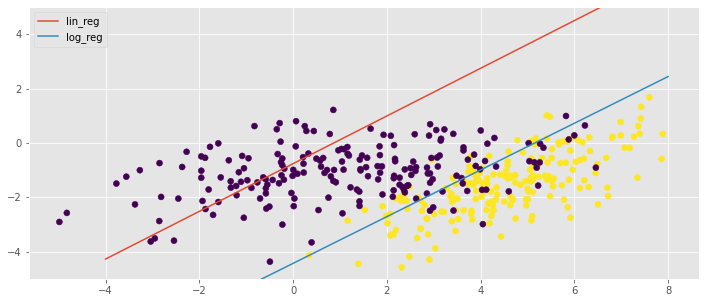

In [11]:


np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, C=100, alpha=0.0009, max_epoch=100, model_type = 'lin_reg')
clf.fit(X, y)
plot_decision_boundary(clf)

clf_log = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=100, model_type = 'log_reg')
clf_log.fit(X, y)
plot_decision_boundary(clf_log)

plt.ylim(-5, 5)
plt.legend(['lin_reg', 'log_reg'], loc = 2)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

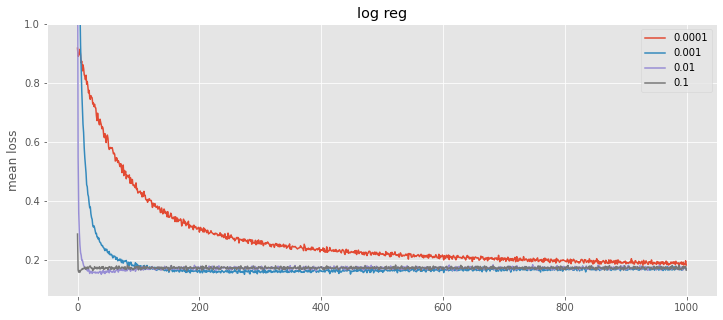

In [14]:
for alpha in [0.0001 ,0.001, 0.01, 0.1]:
    clf = MySGDClassifier(batch_generator, C=100, alpha=alpha, 
                        max_epoch=100, model_type='log_reg')
    clf.fit(X, y, batch_size = 100)
    N = 100
    loss = np.asarray(clf.errors_log["loss"]).reshape(-1, N)
    mean = np.mean (loss, axis = 1)
    plt.plot(mean, label=alpha)
    
plt.ylim (top = 1)
plt.title("log reg")
plt.ylabel("mean loss")
plt.legend()
plt.show()

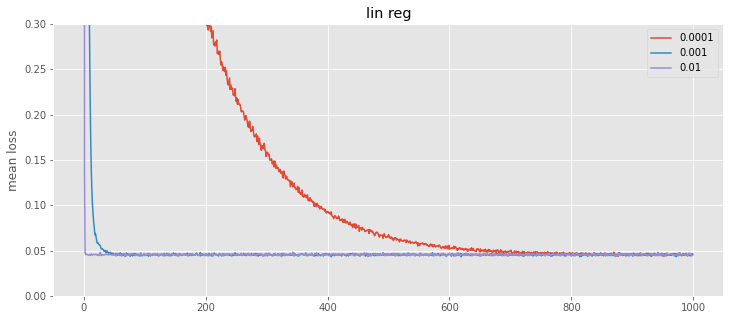

In [15]:
for alpha in [0.0001 ,0.001, 0.01]:
    clf = MySGDClassifier(batch_generator, C=100, alpha=alpha, 
                        max_epoch=100, model_type='lin_reg')
    clf.fit(X, y, batch_size = 100)
    N = 100
    loss = np.asarray(clf.errors_log["loss"]).reshape(-1, N)
    mean = np.mean (loss, axis = 1).flatten()
    plt.plot(mean, label=alpha)
    
plt.ylim (bottom = 0, top = 0.3)
plt.title("lin reg")
plt.ylabel("mean loss")
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Ответ**:
Мне кажется, что мы пропускаем минимум в логистической регрессии, надо `alpha` 
постоянно итеративно уменьшать для этого.
В линейной такого явно не наблюдается, просто ошибка в дальнейшем остается на примерно одном уровне при всех `alpha`. Если выбирать какое-то постоянное значение, то я выбираю 0.01, сходимость быстрая

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/home/nikita/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in square
/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in multiply
/home/nikita/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by 

[-0.03301005946763916, -0.037010005728970584, -0.027049315430556074, -0.025478620910997975, -0.02105048296060845, -0.011573257674614984, -0.004178330223685139, -0.001339866027472206, nan, nan]


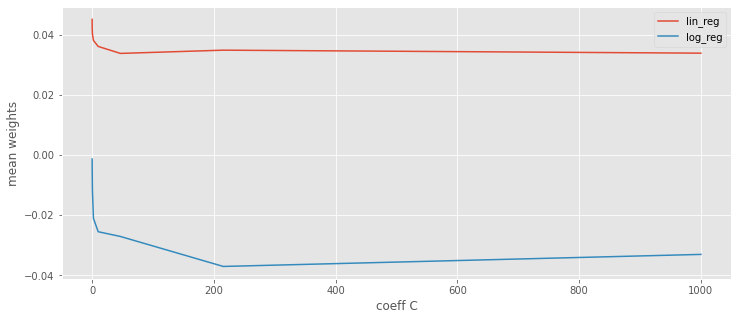

In [16]:
lin_c = []
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator, C=C, alpha=0.01, 
                          max_epoch=10, model_type='lin_reg')
    clf.fit(X, y, batch_size = 100)
    lin_c.append(np.mean(clf.weights))
    
log_c = []
for C in np.logspace(3, -3, 10):
    clf_log = MySGDClassifier(batch_generator, C=C, alpha=0.01, 
                              max_epoch=10, model_type='log_reg')
    clf_log.fit(X, y, batch_size = 100)
    log_c.append(np.mean(clf_log.weights))

# plt.ylim(-1, 1)
print (log_c)
plt.ylabel("mean weights")
plt.xlabel("coeff C")
plt.plot(np.logspace(3, -3, 10), lin_c, label = 'lin_reg')
plt.plot(np.logspace(3, -3, 10), log_c, label = 'log_reg')
plt.legend()
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [17]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [18]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [19]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Нормальный размер батча не меньше 100, иначе супер долго

In [22]:
from itertools import product
from sklearn import model_selection
from sklearn.model_selection import KFold

splits = 10
kf = KFold(n_splits=splits)

def max_barrier(clf, X, y):
    """
    Подбираем порог линейной модели, 
    по достижению которого относим объект 
    к классу 1
    """
    (max_score, max_barr) = (0, 0)
    for barr in np.arange (0, 1, 0.01):
            score = f1_score(y, clf.predict(X) > barr)
            if score > max_score:
                max_score, max_barr = score, barr
    return max_barr

def get_best(model_type, max_epoch, c_list, alpha_list):
    """
    Делаем кросс валидацию и, таким образом, 
    подбираем оптимальные параметры.
    """
    max_result = -1
    for (C, alpha) in product(c_list, alpha_list):
        result = 0.0
        for train_index, test_index in kf.split(X_train):
            X_tr, X_test = X_train[train_index], X_train[test_index]
            y_tr, y_test = y_train[train_index], y_train[test_index]
            
            clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, 
                                  max_epoch=max_epoch, model_type=model_type)
            clf.fit(X_tr, y_tr, batch_size=1000)
            
            barrier = max_barrier(clf, X_test, y_test)
            result += f1_score(y_test, clf.predict(X_test) > barrier)
        
        result /= splits
        if result > max_result:
            max_result = result
            params = {'C': C, 'alpha': alpha, 'max_epoch': max_epoch, 'barrier': barrier}
    
    print(model_type, ':', 'max_f1_score =', max_result, 'with', params)
    return params

In [23]:
#Стараемся разумно ограничить перебор параметров, 
#потому что он и так невероятно долгий

c_list = np.logspace(10, 4, 3)
alpha_list = np.logspace(-2, -3, 3)
max_epoch = 50 #Ну больше ну очень долго будет

print (c_list)
print (alpha_list)
# print (max_epoch_list)


lin_params = get_best('lin_reg', max_epoch,
                      c_list, alpha_list)
log_params = get_best('log_reg', max_epoch,
                      c_list, alpha_list)


[1.e+10 1.e+07 1.e+04]
[0.01       0.00316228 0.001     ]
lin_reg : max_f1_score = 0.5272511687143029 with {'C': 10000000000.0, 'alpha': 0.01, 'max_epoch': 50, 'barrier': 0.15}


/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/nikita/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


log_reg : max_f1_score = 0.5796335858126616 with {'C': 10000.0, 'alpha': 0.01, 'max_epoch': 50, 'barrier': 0.18}


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [24]:
log_clf = MySGDClassifier(batch_generator, C=log_params['C'], alpha=log_params['alpha'], 
                                  max_epoch=log_params ['max_epoch'], model_type='log_reg')
log_clf.fit(X_train, y_train, batch_size=1000)

# f1_score(y_train, log_clf.predict(X_train)> 0.30)

MySGDClassifier(C=10000.0, alpha=0.01,
                batch_generator=<function batch_generator at 0x7ff3475a38c0>,
                max_epoch=50, model_type='log_reg')

Порог подбираю в функции max_barrier

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Получаю выше параметры и выбираю логистическую регрессию, тк результат у неё лучше

С лучшими параметрами получаем тестовые данные:

In [25]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, pair_id, title))
    
X_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, pair_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            *_, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        pairs_id.append(pair_id)
X_test = np.array(X_test)
X_test = scaler.transform(X_test)
print(X_test.shape)

(16627, 15)


In [26]:
X_test = scaler.fit_transform(X_test)
predict = np.asarray(log_clf.predict(X_test) > log_params['barrier'], dtype=int)

In [27]:
test_data["target"] = pd.Series(predict)
with open("predict.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))
print("good")

good


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

**Kaggle:** Bob000011

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Было очень потно, но может я просто медленно соображаю. А так интересно, расшаривает очень.